In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
import joblib

df=pd.read_csv('MRec2.csv')
df.head()

,Age,Gender,Happy,Gloomy,Stressed,Relaxing,Energetic
0,32,Male,Rock,Instrumental,Instrumental,Instrumental,Rock
1,32,Female,Country,Instrumental,Rock,Instrumental,Instrumental
2,32,Female,Hiphop,Blues,Pop,Instrumental,Rock
3,32,Female,Hiphop,Blues,Pop,Instrumental,Rock
4,17,Female,Pop,Indie/Acoustic,Country,Instrumental,EDM


In [68]:
df.tail()

,Age,Gender,Happy,Gloomy,Stressed,Relaxing,Energetic
149,28,Female,Pop,Indie/Acoustic,Rock,Indie/Acoustic,Rock
150,31,Female,Hiphop,Country,Country,Indie/Acoustic,Instrumental
151,29,Male,Blues,Blues,Rock,Instrumental,Hiphop
152,34,Female,Pop,Indie/Acoustic,Rock,Instrumental,Rock
153,33,Male,Hiphop,Rock,Rock,Instrumental,Country


In [69]:
#Mean, std, and quartiles of dataset
df.describe()

,Age
count,154.000000
mean,27.064935
std,8.047795
min,17.000000
25%,21.000000
50%,24.000000
75%,32.000000
max,55.000000


In [70]:
#Checking for null values to fill
print("Number of null values:")
print(df.isnull().sum())

Number of null values:
Age          0
Gender       0
Happy        0
Gloomy       0
Stressed     0
Relaxing     0
Energetic    0
dtype: int64


In [71]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Age : [32 17 18 21 19 23 33 45 30 27 42 22 24 31 43 28 26 25 20 37 47 29 49 39
 55 36 34]
Gender : ['Male' 'Female' 'Prefer not to say']
Happy : ['Rock' 'Country' 'Hiphop' 'Pop' 'Indie/Acoustic' 'EDM' 'Instrumental'
 'Blues']
Gloomy : ['Instrumental' 'Blues' 'Indie/Acoustic' 'Rock' 'Pop' 'EDM' 'Hiphop'
 'Country']
Stressed : ['Instrumental' 'Rock' 'Pop' 'Country' 'Indie/Acoustic' 'Blues' 'EDM'
 'Hiphop']
Relaxing : ['Instrumental' 'Hiphop' 'Indie/Acoustic' 'Country' 'Pop' 'Blues' 'Rock'
 'EDM']
Energetic : ['Rock' 'Instrumental' 'EDM' 'Pop' 'Blues' 'Hiphop' 'Country'
 'Indie/Acoustic']


In [72]:
#Dropping empty columns
df = df.dropna(axis='columns', how='all')

print("Data after dropping empty columns:")
print(df.shape)

Data after dropping empty columns:
(154, 7)


In [77]:
#Replacing categorical data with integer values

df['Gender'].replace(['Male','Female','Prefer not to say'],[0,1,0.5], inplace=True)

#Replace null values with NaN
df['Age'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Age'])
df['Gender'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Gender'])

df.head(7)


,Age,Gender,Happy,Gloomy,Stressed,Relaxing,Energetic
0,32,0.0,Rock,Instrumental,Instrumental,Instrumental,Rock
1,32,1.0,Country,Instrumental,Rock,Instrumental,Instrumental
2,32,1.0,Hiphop,Blues,Pop,Instrumental,Rock
3,32,1.0,Hiphop,Blues,Pop,Instrumental,Rock
4,17,1.0,Pop,Indie/Acoustic,Country,Instrumental,EDM
5,17,1.0,Pop,Blues,Indie/Acoustic,Hiphop,Rock
6,17,1.0,Indie/Acoustic,Indie/Acoustic,Indie/Acoustic,Indie/Acoustic,Rock


In [78]:
#Replacing NaN instances with mean values
columns=df[['Age','Gender']]
for col in columns:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head(7)

,Age,Gender,Happy,Gloomy,Stressed,Relaxing,Energetic
0,32,0.0,Rock,Instrumental,Instrumental,Instrumental,Rock
1,32,1.0,Country,Instrumental,Rock,Instrumental,Instrumental
2,32,1.0,Hiphop,Blues,Pop,Instrumental,Rock
3,32,1.0,Hiphop,Blues,Pop,Instrumental,Rock
4,17,1.0,Pop,Indie/Acoustic,Country,Instrumental,EDM
5,17,1.0,Pop,Blues,Indie/Acoustic,Hiphop,Rock
6,17,1.0,Indie/Acoustic,Indie/Acoustic,Indie/Acoustic,Indie/Acoustic,Rock


In [ ]:
#Checking for null values again
df.isnull().sum()

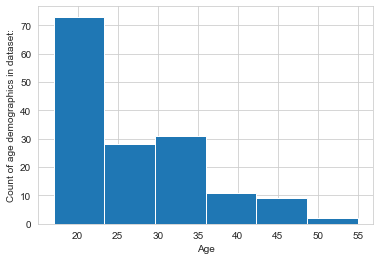

In [85]:
#Histogram of age
plt.hist(df['Age'], bins=6)
plt.xlabel("Age")
plt.ylabel("Count of age demographics in dataset:")

plt.show()

(array([23., 11., 14.,  0., 74., 12.,  0.,  7.,  8.,  5.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

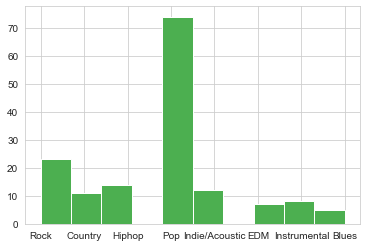

In [92]:
plt.hist(df['Happy'],color = "#4CAF50")


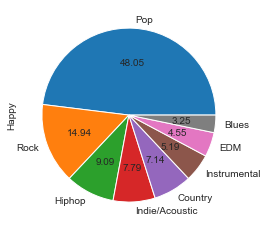

In [93]:
#Distribution of genre by pie-chart
df['Happy'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

<AxesSubplot:xlabel='Genre', ylabel='Mood'>

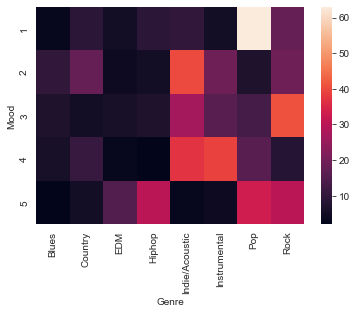

In [44]:
#Correlation between Mood and Genre
sns.heatmap(pd.crosstab(df['Mood'], df['Genre']))

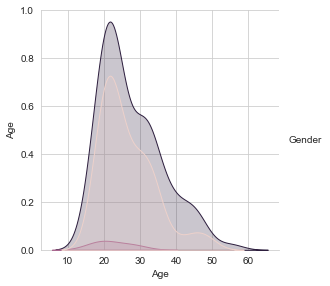

In [95]:
#Pairplot between all numerical categories
sns.set_style("whitegrid");
columns = ['Age','Gender','Happy','Gloomy','Stressed','Relaxing','Energetic']
sns.pairplot(df[columns], hue="Gender",height = 4 ,kind ='scatter',diag_kind='kde')
plt.show()

In [97]:
#Model testing
X=df[['Age','Gender']]
y=df['Happy','Gloomy','Stressed','Relaxing','Energetic']
X_train,X_test,y_train,y_test=train_test_split(X.values,y,test_size = 0.25, random_state = 1000)
model=DecisionTreeClassifier()
model=model.fit(X_train, y_train)

KeyError: ('Happy', 'Gloomy', 'Stressed', 'Relaxing', 'Energetic')

In [47]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

from joblib import dump, load
joblib.dump(model,'C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')

predictions=model.predict(X_test)

In [48]:
import pickle
import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler
mdl = joblib.load('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')
X= pd.read_csv('MRec.csv')
X_test = [[21,1,1],[22,0,4],[29,0,5],[31,0,4],[55,1,4]]
y_pred=mdl.predict(X_test)

val=pd.DataFrame(y_pred, columns=['Genre'])
val

,Genre
0,Pop
1,Indie/Acoustic
2,Hiphop
3,Country
4,Instrumental


In [49]:
#Load saved model
lr = joblib.load('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')
#with open('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.sav' , 'rb') as f:
#    lr = pickle.load(f)
X=[[21,1,1],[22,0,4],[29,0,5],[31,0,4],[55,1,4]]
lr.predict(X)

array(['Pop', 'Indie/Acoustic', 'Hiphop', 'Country', 'Instrumental'],
      dtype=object)

<AxesSubplot:>

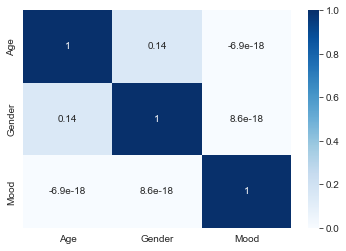

In [50]:
#Relationship analysis
sns.heatmap(df.corr(),cbar=True, annot=True, cmap='Blues')

In [51]:
#Outliers
#q1=df.quantile(0.25)
#q3=df.quantile(0.75)
#iqr=q3-q1

#print(   (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))  )

#y_pred = model.predict(X_test)
#print("accuracy_score: %.2f" % accuracy_score(y_test, y_pred))

In [52]:
#Unnecessary
#sns.barplot(x=df['Genre'], y=df['Age'],hue = df["Gender"])
#plt.show()